In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
Housing_data=pd.read_csv('HOUSING_DATA.csv')
Housing_data


,Indicator,RegionID,Date,Year,Home_value,Mongo_ID,City_Name,City_Size
0,ZATT,42415,1/31/2021,2021,334409,60403049bff9453704dc7595,"Waterloo, IA",Medium
1,ZATT,42415,12/31/2020,2020,332905,60403049bff9453704dc7596,"Waterloo, IA",Medium
2,ZATT,42415,11/30/2020,2020,331546,60403049bff9453704dc7597,"Waterloo, IA",Medium
3,ZATT,42415,10/31/2020,2020,334579,60403049bff9453704dc7598,"Waterloo, IA",Medium
4,ZATT,42415,9/30/2020,2020,336513,60403049bff9453704dc7599,"Waterloo, IA",Medium
...,...,...,...,...,...,...,...,...
2860,ZATT,394692,5/31/1996,1996,203496,60403609bff9453704dd3fdc,"Houston, TX",Big
2861,ZATT,394692,4/30/1996,1996,203364,60403609bff9453704dd3fdd,"Houston, TX",Big
2862,ZATT,394692,3/31/1996,1996,203177,60403609bff9453704dd3fde,"Houston, TX",Big
2863,ZATT,394692,2/29/1996,1996,203184,60403609bff9453704dd3fdf,"Houston, TX",Big


In [53]:
Houston = Housing_data.loc[Housing_data['City_Name']=='Houston, TX']

Boston = Housing_data.loc[Housing_data['City_Name']=='Boston, MA']

Waterloo = Housing_data.loc[Housing_data['City_Name']=='Waterloo, IA']

SantaFe = Housing_data.loc[Housing_data['City_Name']=='Santa Fe, NM']

StAugustine = Housing_data.loc[Housing_data['City_Name']=='St. Augustine, FL']

Williamsburg = Housing_data.loc[Housing_data['City_Name']=='Williamsburg, VA']

Portland = Housing_data.loc[Housing_data['City_Name']=='Portland, WA']

Cookeville = Housing_data.loc[Housing_data['City_Name']=='Cookeville, TN']

Charlotte = Housing_data.loc[Housing_data['City_Name']=='Charlotte, NC']

Chicago = Housing_data.loc[Housing_data['City_Name']=='Chicago, IL']


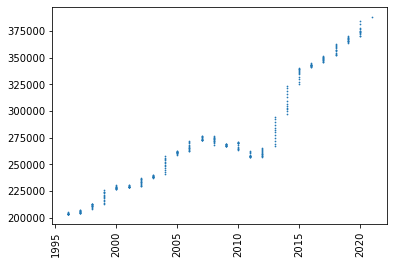

In [51]:
Houston_plt= plt.scatter(Houston['Year'],Houston['Home_value'], s= 0.5)
                         
plt.xticks(rotation=45)
plt.show()